In [1]:
#imports
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.integrate import simps
from scipy.fft import fftshift
from tsfel.feature_extraction import features as tsfelf
from os import listdir, getcwd
from os.path import isfile, join

In [2]:
cwd = getcwd()
files=listdir(cwd)
print( files)
dataset = pd.read_csv(cwd+"//"+'DataFrame_26_01_22.csv')
dataset.head()

['Capstone_ML3-checkpoint.ipynb', 'Capstone_ML3.ipynb', 'Capstone_ML_For_First_recording-checkpoint.ipynb', 'Capstone_ML_For_First_recording-Copy1-checkpoint.ipynb', 'Capstone_ML_For_First_recording-Copy1.ipynb', 'Capstone_ML_For_First_recording.ipynb', 'Capstone_ML_January-checkpoint.ipynb', 'Capstone_ML_January.ipynb', 'Capstone_ML_Slippery_Non-slippery-3s-checkpoint.ipynb', 'Capstone_ML_Slippery_Non-slippery-3s.ipynb', 'Capstone_ML_Slippery_Non-slippery-checkpoint.ipynb', 'Capstone_ML_Slippery_Non-slippery.ipynb', 'Capstone_read_signal-checkpoint.ipynb', 'Capstone_read_signal.ipynb', 'Capstone_Speed_correlation-checkpoint.ipynb', 'Capstone_Speed_correlation.ipynb', 'Capstone_Ylläs-checkpoint.ipynb', 'Capstone_Ylläs.ipynb', 'DataFrame_26_01_22.csv', 'machine_learning_03_02_-22.ipynb']


,Label,RMS,RMS_filt,Zero_Cross,Zero_Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt,kurt_filt
0,Wet gravel,121.923915,85.871182,1120,1674,712.590500,812.060447,900.848870,920.884994,121.922846,85.871172,-0.362460
1,Wet gravel,118.560778,82.954567,1603,2353,836.841845,959.870817,1023.901987,1052.362948,118.559703,82.954551,-0.063924
2,Wet gravel,143.706060,105.422731,3033,4376,1273.958122,1420.278532,1242.612459,1233.842812,143.704598,105.422727,0.188639
3,Wet gravel,180.741534,133.436762,3092,4087,1165.099724,1327.875529,1232.012470,1235.471666,180.741034,133.436755,2.368671
4,Wet gravel,297.383143,233.135263,4443,5729,1466.841266,1608.260925,1333.457680,1316.249909,297.382430,233.135245,1.412549


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [4]:
features = ["RMS", "RMS_filt", "Zero_Cross", "Zero_Cross_filt", "Spectral_centroid", "Spectral_centroid_filt", "Spectral_spread", "Spectral_spread_filt", "STD", "STD_filt", "kurt_filt"]

In [13]:

def getTypes(dataframe,column):
    labels=dataframe[column]
    tuples=[]
    types=[]
    for label in labels:
        if label not in types:
            types.append(label)
            
    
    for type in types:
        count=0
        for label in labels:
            if label == type:
                count+=1
        tuples.append((type,count))
    return tuples,types

dataset = dataset.dropna()
print(getTypes(dataset,"Label"))
X = dataset[features]
y = dataset["Label"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True, stratify=y)

([('Wet gravel', 93), ('Dry gravel', 246), ('Dry asphalt', 1176), ('Wet asphalt', 483), ('Ice', 42), ('Snow', 724)], ['Wet gravel', 'Dry gravel', 'Dry asphalt', 'Wet asphalt', 'Ice', 'Snow'])


In [34]:
import time
start=time.time()
# Constructing the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
end=time.time()
print("knn ready to bother its neighbors")
print("Training time: ",end-start,"seconds")
start=time.time()
y_pred_knn = knn.predict(x_test)
end=time.time()
print("Prediction time: ",end-start,"seconds")
print("Accuracy knn: ", np.round(accuracy_score(y_test, y_pred_knn),2))
print("------------------------------")



# SVC
start=time.time()
# Constructing the Support vector classifier
clf = sklearn.svm.SVC(kernel='linear') 
clf.fit(x_train, y_train)
print("support vector machine assembled")
end=time.time()
print("Training time: ",end-start,"seconds")
start=time.time()
#Getting predictions
y_pred_svc = clf.predict(x_test)
end=time.time()
print("Prediction time: ",end-start,"seconds")
print("Accuracy svc: ", np.round(accuracy_score(y_test, y_pred_svc),2))
print("------------------------------")


# Decision tree
start=time.time()
# Constructing the Decision tree model
treeclf = tree.DecisionTreeClassifier()
treeclf.fit(x_train, y_train)
print("Decision tree ready for a trim")
end=time.time()
print("Training time: ",end-start,"seconds")
start=time.time()
y_pred_tree = treeclf.predict(x_test)
end=time.time()
print("Prediction time: ",end-start,"seconds")
print("Accuracy Decision Tree : ", np.round(accuracy_score(y_test, y_pred_tree),2))
print("------------------------------")



# Random Forest
start=time.time()
# Constructing the random forest model
rforestclf = RandomForestClassifier(n_estimators = 500)
rforestclf.fit(x_train, y_train)
print("random forest ready for harvesting")
end=time.time()
print("Training time: ",end-start,"seconds")
start=time.time()
y_pred_rforest = rforestclf.predict(x_test)
end=time.time()
print("Prediction time: ",end-start,"seconds")
print("Accuracy Random forest : ", np.round(accuracy_score(y_test, y_pred_rforest),2))
print("------------------------------")


# Extra trees classifier
start=time.time()
# Constructing the Extra trees model
xtreesclf = ExtraTreesClassifier(n_estimators = 500)
xtreesclf.fit(x_train, y_train)
print("extra trees ready for chopping")
end=time.time()
print("Training time: ",end-start,"seconds")
start=time.time()
y_pred_xtrees = xtreesclf.predict(x_test)
end=time.time()
print("Prediction time: ",end-start,"seconds")
print("Accuracy Extra Trees : ", np.round(accuracy_score(y_test, y_pred_xtrees),2))
print("------------------------------")




# Naive bayes
start=time.time()
# Constructing the Naive Bayesian model
gnb = GaussianNB()
nbclf = gnb.fit(x_train, y_train)
print("Bayes made very naive")
end=time.time()
print("Training time: ",end-start,"seconds")
start=time.time()
y_pred_nb = nbclf.predict(x_test)
end=time.time()
print("Prediction time: ",end-start,"seconds")
print("Accuracy Naive Bayes : ", np.round(accuracy_score(y_test, y_pred_nb),2))

knn ready to bother its neighbors
Training time:  0.004003763198852539 seconds
Prediction time:  0.01201319694519043 seconds
Accuracy knn:  0.86
------------------------------
support vector machine assembled
Training time:  243.65444922447205 seconds
Prediction time:  0.006005525588989258 seconds
Accuracy svc:  0.85
------------------------------
Decision tree ready for a trim
Training time:  0.013011693954467773 seconds
Prediction time:  0.0010008811950683594 seconds
Accuracy Decision Tree :  0.89
------------------------------
random forest ready for harvesting
Training time:  1.294158697128296 seconds
Prediction time:  0.052047014236450195 seconds
Accuracy Random forest :  0.93
------------------------------
extra trees ready for chopping
Training time:  0.5660209655761719 seconds
Prediction time:  0.06105518341064453 seconds
Accuracy Extra Trees :  0.94
------------------------------
Bayes made very naive
Training time:  0.0020020008087158203 seconds
Prediction time:  0.0020020008

C:\Users\AtteR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


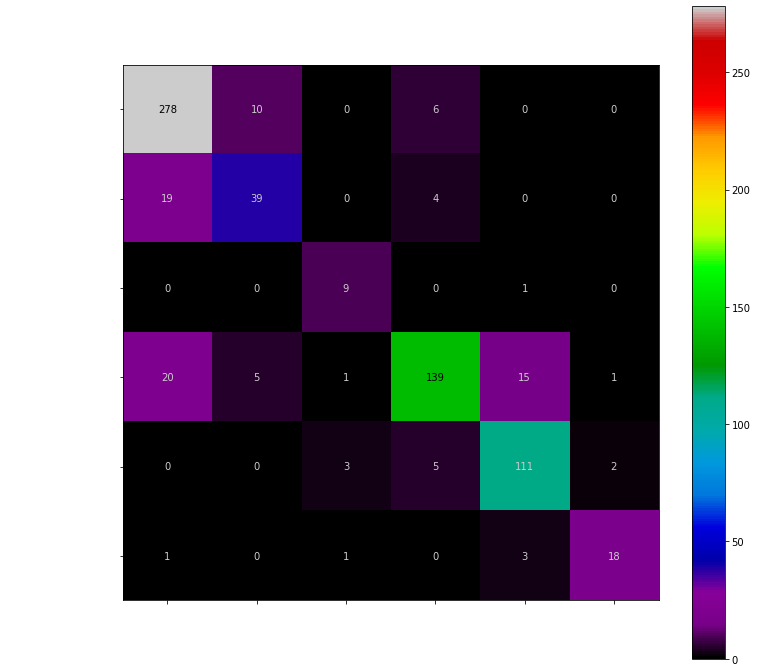

C:\Users\AtteR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


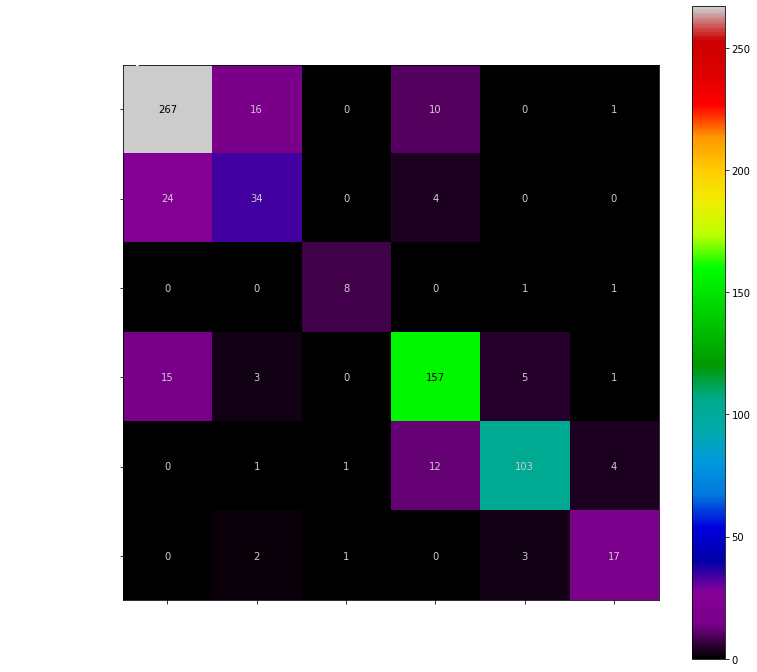

C:\Users\AtteR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


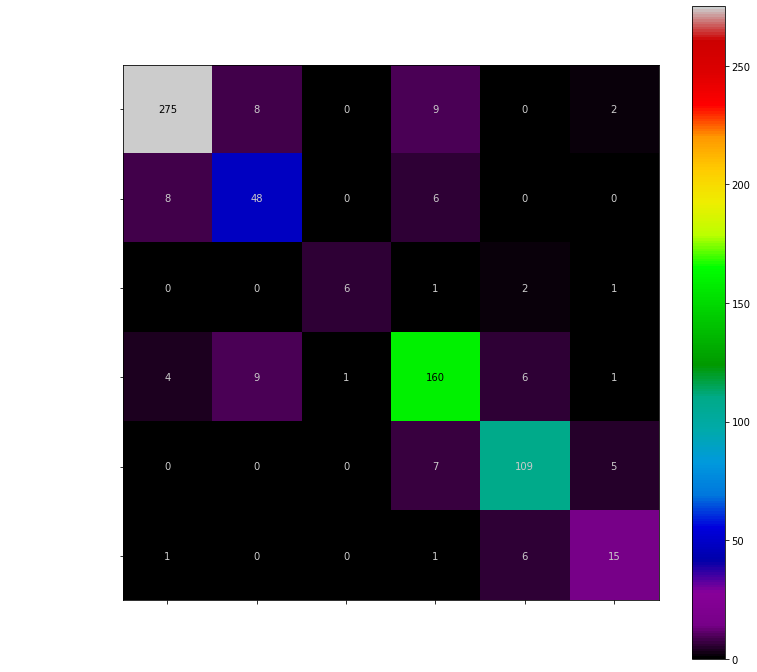

C:\Users\AtteR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


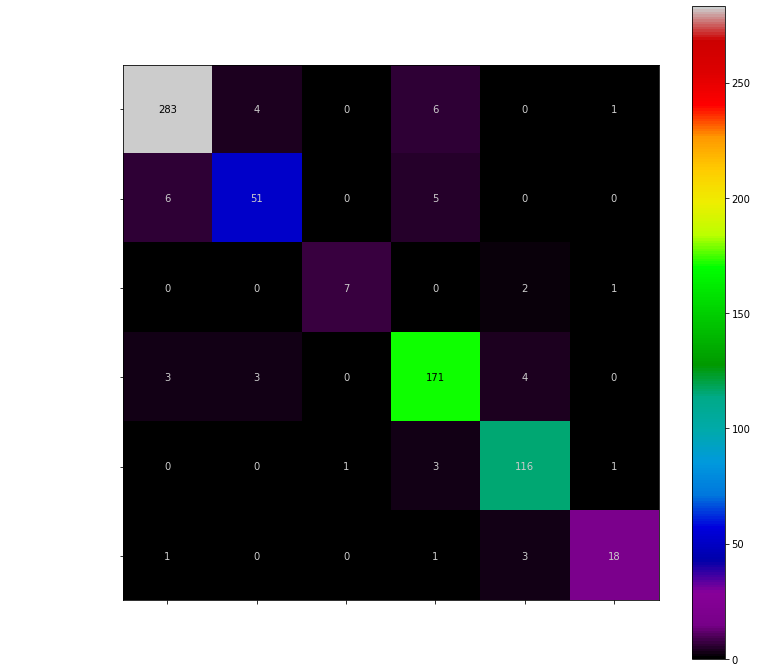

C:\Users\AtteR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


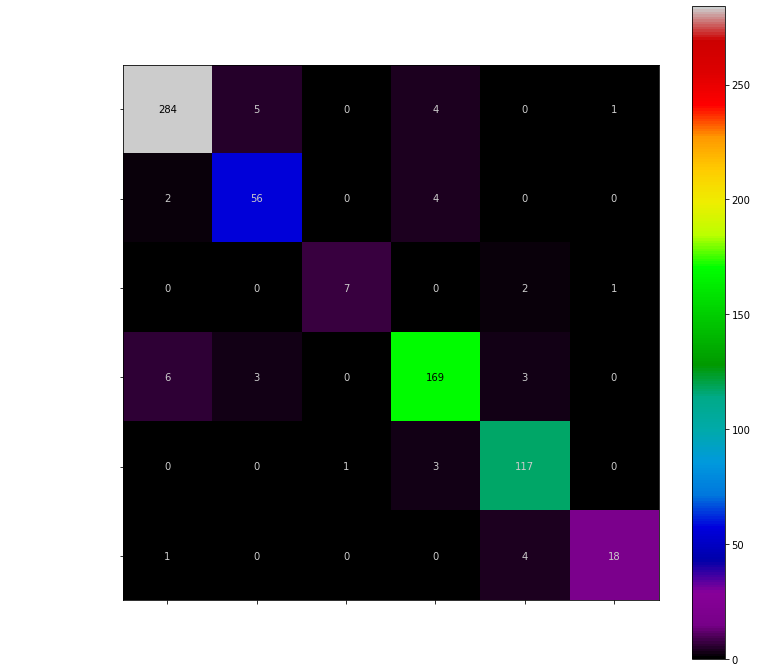

C:\Users\AtteR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


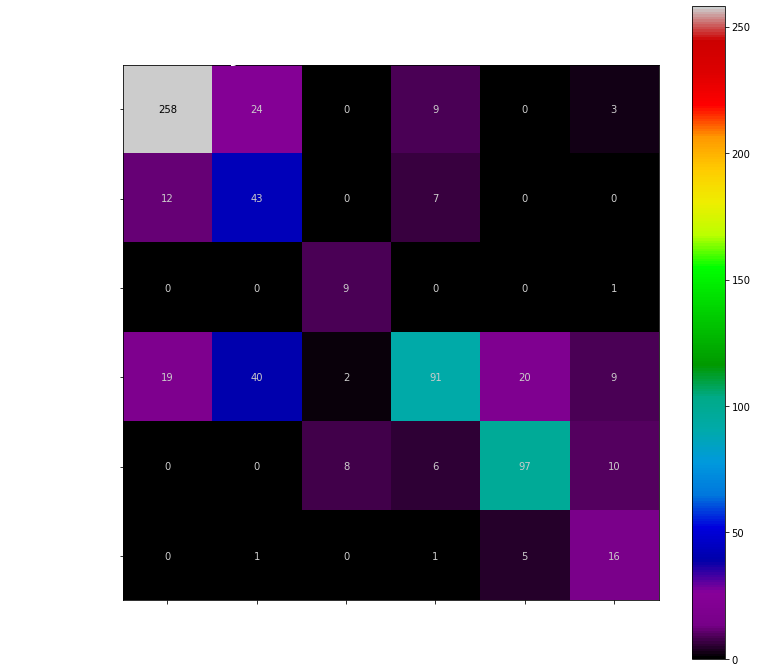

In [35]:


predictions=[(knn,"KNN"),(clf,"Support vector"),(treeclf,"Decision tree"),(rforestclf,"Random forest"),
            (xtreesclf,"Extra trees"),(nbclf,"Naive bayes")]
for tuple in predictions:
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.set_title(tuple[1]+" classifier confusion matrix", fontsize=30,color="white")
    plot_confusion_matrix(tuple[0], x_test, y_test,ax=ax,cmap="nipy_spectral")
    ax.xaxis.set_ticklabels(['Dry asphalt','Dry gravel',"Ice","Snow","Wet asphalt", "Wet gravel"],fontsize=15,color="white")
    ax.yaxis.set_ticklabels(['Dry asphalt','Dry gravel',"Ice","Snow","Wet asphalt", "Wet gravel"],fontsize=15,color="white")
    ax.set_xlabel("Predicted label",fontsize=15,color="white")
    ax.set_ylabel("True label",fontsize=15,color="white")
    plt.savefig(tuple[1]+'.png')
    plt.show()
    




In [36]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy knn: ", np.round(accuracy_score(y_test, y_pred_knn),2))
print("Accuracy svc: ", np.round(accuracy_score(y_test, y_pred_svc),2))
print("Accuracy Decision Tree : ", np.round(accuracy_score(y_test, y_pred_tree),2))
print("Accuracy Random forest : ", np.round(accuracy_score(y_test, y_pred_rforest),2))
print("Accuracy Extra Trees : ", np.round(accuracy_score(y_test, y_pred_xtrees),2))
print("Accuracy Naive Bayes : ", np.round(accuracy_score(y_test, y_pred_nb),2))

print("------------------------------")

print("Precision knn: ", np.round(precision_score(y_test, y_pred_knn, average='macro'),2))
print("Precision svc: ", np.round(precision_score(y_test, y_pred_svc, average = 'macro'),2))
print("Precision Decision Tree: ", np.round(precision_score(y_test, y_pred_tree, average = 'macro'),2))
print("Precision Random Forest: ", np.round(precision_score(y_test, y_pred_rforest, average = 'macro'),2))
print("Precision Extra trees: ", np.round(precision_score(y_test, y_pred_xtrees, average = 'macro'),2))
print("Precision Naive Bayes: ", np.round(precision_score(y_test, y_pred_nb, average = 'macro'),2))

print("------------------------------")

print("Recall knn: ", np.round(recall_score(y_test, y_pred_knn, average = 'macro'),2))
print("Recall svc: ", np.round(recall_score(y_test, y_pred_svc, average = 'macro'),2))     
print("Recall Decision tree: ", np.round(recall_score(y_test, y_pred_tree, average = 'macro'),2))  
print("Recall Random forest: ", np.round(recall_score(y_test, y_pred_rforest, average = 'macro'),2))     
print("Recall Extra trees: ", np.round(recall_score(y_test, y_pred_xtrees, average = 'macro'),2)) 
print("Recall Naive Bayes: ", np.round(recall_score(y_test, y_pred_nb, average = 'macro'),2)) 

print("------------------------------")
 
print("F1 knn: ", np.round(f1_score(y_test, y_pred_knn, average = 'macro'),2))
print("F1 svc: ", np.round(f1_score(y_test, y_pred_svc, average = 'macro'),2))            
print("F1 Decision Tree: ", np.round(f1_score(y_test, y_pred_tree, average = 'macro'),2))  
print("F1 Random forest: ", np.round(f1_score(y_test, y_pred_rforest, average = 'macro'),2))  
print("F1 Extra trees: ", np.round(f1_score(y_test, y_pred_xtrees, average = 'macro'),2)) 
print("F1 Naive Bayes: ", np.round(f1_score(y_test, y_pred_nb, average = 'macro'),2)) 

Accuracy knn:  0.86
Accuracy svc:  0.85
Accuracy Decision Tree :  0.89
Accuracy Random forest :  0.93
Accuracy Extra Trees :  0.94
Accuracy Naive Bayes :  0.74
------------------------------
Precision knn:  0.81
Precision svc:  0.79
Precision Decision Tree:  0.82
Precision Random Forest:  0.9
Precision Extra trees:  0.91
Precision Naive Bayes:  0.63
------------------------------
Recall knn:  0.82
Recall svc:  0.79
Recall Decision tree:  0.79
Recall Random forest:  0.86
Recall Extra trees:  0.88
Recall Naive Bayes:  0.75
------------------------------
F1 knn:  0.81
F1 svc:  0.79
F1 Decision Tree:  0.8
F1 Random forest:  0.88
F1 Extra trees:  0.89
F1 Naive Bayes:  0.66


In [11]:

start = time.time()
model = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
end = time.time()
print('KNN Leave one out cv accuracy:', round(np.mean(scores)*100,1), '%')
print("Time: ",end-start,"seconds")
print("------------------------------")

start = time.time()
model = sklearn.svm.SVC(kernel='linear') 
scores = cross_val_score(model, X, y, scoring='accuracy', cv=10, n_jobs=-1)
end = time.time()
print('SVM classifier 10-cv accuracy:', round(np.mean(scores)*100,1), '%')
print("Time: ",end-start,"seconds")
print("------------------------------")

start = time.time()
model = tree.DecisionTreeClassifier()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
end = time.time()
print('Decision tree leave one out cv accuracy:', round(np.mean(scores)*100,1), '%')
print("Time: ",end-start,"seconds")
print("------------------------------")

start = time.time()
model = RandomForestClassifier(n_estimators = 500)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
end = time.time()
print('Random forest leave one out cv accuracy:', round(np.mean(scores)*100,1), '%')
print("Time: ",end-start,"seconds")
print("------------------------------")

start = time.time()
model = ExtraTreesClassifier(n_estimators = 500)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
end = time.time()
print('Extra trees leave one out cv accuracy:', round(np.mean(scores)*100,1), '%')
print("Time: ",end-start,"seconds")
print("------------------------------")

start = time.time()
model = GaussianNB()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
end = time.time()
print('Naive Bayes leave one out cv accuracy:', round(np.mean(scores)*100,1), '%')
print("Time: ",end-start,"seconds")

KNN Leave one out cv accuracy: 87.8 %
Time:  3.008044481277466 seconds
------------------------------
SVM classifier 10-cv accuracy: 82.2 %
Time:  506.6962296962738 seconds
------------------------------
Decision tree leave one out cv accuracy: 89.7 %
Time:  6.114670038223267 seconds
------------------------------
Random forest leave one out cv accuracy: 93.3 %
Time:  580.9987144470215 seconds
------------------------------
Extra trees leave one out cv accuracy: 94.2 %
Time:  269.3608160018921 seconds
------------------------------
Naive Bayes leave one out cv accuracy: 74.7 %
Time:  1.8471648693084717 seconds
